In [1]:
# Base environment
import time 
import os
# Core libraries
import psycopg2 as p
import odpy.wellman as wm
import pandas as pd
import numpy as np
# Own
import py_to_psql as pp
import opendtect_to_py as op

## DATABASE CONNECTION

In [2]:
conn = p.connect(
    host="192.168.1.107",
    database="mnsh_thesis",
    user="lsdr94",
    password="Pelusa120894"
)

In [3]:
def missing_val_df(
    df, 
    drop_cols,
    cols=["Non-Null Count", "% of no nulls", "Dtype"] 
    ):
    mv_df = pd.DataFrame(
        data=[
            df.count(), 
            (df.count()*100/df.count().max()).round(2), 
            df.dtypes
        ]
    ).transpose()
    mv_df.columns = cols
    return mv_df.drop(index=drop_cols)

## DATABASE: UPDATE

### DROP COLUMNS

In [5]:
# drop columns
de_spiked = ["gr", "dtco", "rhob", "drho", "nphi", "pef"]
for log in de_spiked:
    drop_columns_query = f"""
        ALTER table {log}_table
            DROP COLUMN md_despiked,
            DROP COLUMN {log}_despiked,
            DROP COLUMN despiked_log_name
    """
    pp.execute_psql_command(drop_columns_query, conn)
predicted = ["rhob", "nphi"]   
for log in predicted:
    drop_columns_query = f"""
        ALTER table {log}_table
            DROP COLUMN md_predicted,
            DROP COLUMN {log}_predicted,
            DROP COLUMN predicted_log_name,         
            DROP COLUMN md_merged,
            DROP COLUMN {log}_merged,
            DROP COLUMN merged_log_name
    """
    pp.execute_psql_command(drop_columns_query, conn)

### ALTER TABLES

In [6]:
de_spiked = ["gr", "dtco", "rhob", "drho", "nphi", "pef"]
for log in de_spiked:
    de_spiked_query = f"""
    ALTER TABLE {log}_table
        ADD COLUMN md_despiked NUMERIC(13,5)[],
        ADD COLUMN {log}_despiked NUMERIC(13,5)[],
        ADD COLUMN despiked_log_name VARCHAR(30)
    """
    pp.execute_psql_command(de_spiked_query, conn)

predicted = ["rhob", "nphi"]   
for log in predicted:
    predictions_query = f"""
    ALTER TABLE {log}_table
        ADD COLUMN md_predicted NUMERIC(13,5)[],
        ADD COLUMN {log}_predicted NUMERIC(13,5)[],
        ADD COLUMN predicted_log_name VARCHAR(30),
        ADD COLUMN md_merged NUMERIC(13,5)[],
        ADD COLUMN {log}_merged NUMERIC(13,5)[],
        ADD COLUMN merged_log_name VARCHAR(30)
    """
    pp.execute_psql_command(predictions_query, conn)

### INSERTION OF DE-SPIKED, PREDICTION AND MERGED LOGS INTO TABLES

#### FETCH WELLS WITH ZECHSTEIN AND ROTLIEGENDES MARKERS

In [4]:
dropped_wells = [
    '41/10- 1', '41/10a- 2Z', '41/14- 1', '41/15- 1', '41/20- 1', '41/25a- 1',
    '42/16- 1', '42/18- 2','42/21- 1', '42/22- 1', 
    '43/03- 1', '43/05- 1', 
    '44/12- 1'
]

zech_rot_wells = """
SELECT well_name
FROM markers
WHERE top_zechstein IS NOT NULL AND top_rotliegendes IS NOT NULL;
"""
wells = pp.fetch_psql_command(zech_rot_wells, conn)[1]
well_list = []
for well in wells:
    if well[0] not in dropped_wells:
        well_list += [well[0]]

#### DE-SPIKED LOGS

In [5]:
de_spiked = ["gr", "dtco", "rhob", "drho", "nphi", "pef"]
for log in de_spiked:
    column_name = ["md_despiked", f"{log}_despiked", "despiked_log_name"]
    print(f"\nProccessing update query. Concept: well log '{log}' insertion in array mode")
    for well in well_list:
        print(f"\nWell {well}")
        pp.execute_psql_command(
            op.update_log_as_arrays_query(
                well, 
                f"{log}", 
                f"{log}_table", 
                conn, 
                column_names=column_name
            ),
            conn
    )


Proccessing update query. Concept: well log 'gr' insertion in array mode

Well 20/06- 1

Well 20/12- 2

Well 20/12- 3

Well 26/07- 1

Well 26/08- 1

Well 26/14- 1

Well 28/12- 1

Well 29/16- 1

Well 29/18- 1

Well 29/20- 1

Well 29/27- 1

Well 30/21- 1

Well 30/23- 1

Well 30/27- 1

Well 30/28- 1

Well 30/29a- 3
Log gr not found for Well 30/29a- 3.

Well 36/26- 1

Well 38/01- 1

Well 38/03- 1

Well 38/10- 1

Well 39/02- 1
Log gr not found for Well 39/02- 1.

Well 39/11- 1

Proccessing update query. Concept: well log 'dtco' insertion in array mode

Well 20/06- 1

Well 20/12- 2

Well 20/12- 3

Well 26/07- 1

Well 26/08- 1

Well 26/14- 1

Well 28/12- 1

Well 29/16- 1

Well 29/18- 1

Well 29/20- 1

Well 29/27- 1

Well 30/21- 1

Well 30/23- 1

Well 30/27- 1

Well 30/28- 1

Well 30/29a- 3
Log dtco not found for Well 30/29a- 3.

Well 36/26- 1

Well 38/01- 1

Well 38/03- 1

Well 38/10- 1

Well 39/02- 1
Log dtco not found for Well 39/02- 1.

Well 39/11- 1

Proccessing update query. Concept: we

#### PREDICTIONS

In [9]:
predictions = ["rhob", "nphi"]
for log in predictions:
    column_name = ["md_predicted", f"{log}_predicted", "predicted_log_name"]
    print(f"\nProccessing update query. Concept: well log '{log}' insertion in array mode")
    for well in well_list:
        print(f"\nWell {well}")
        pp.execute_psql_command(
            op.update_log_as_arrays_query(
                well, 
                f"{log}_XGB", 
                f"{log}_table", 
                conn, 
                column_names=column_name
            ),
            conn
    )


Proccessing update query. Concept: well log 'rhob' insertion in array mode

Well 20/06- 1

Well 20/12- 2
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.21', 'rhob_XGB']' returned non-zero exit status 1.
Log rhob_XGB not found for Well 20/12- 2.

Well 20/12- 3
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.219', 'rhob_XGB']' returned non-zero exit status 1.
Log rhob_XGB not found for Well 20/12- 3.

Well 26/07- 1

Well 26/08- 1

Well 26/14- 1

Well 28/12- 1

Well 29/16- 1

Well 29/18- 1

Well 29/20- 1

Well 29/27- 1

Well 30/21- 1

Well 30/23- 1

Well 30/27- 1

Well 30/28- 1
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.89', 'rhob_XGB']' returned non-zero exit status 1.
Log rhob_XGB not found for Well 30/28- 1.

Well 30/29a- 3
Log rhob_XGB not found for Well 30/29a- 3.

Well 36/26- 1

Well 38/

#### MERGES

In [10]:
predictions = ["rhob", "nphi"]
for log in predictions:
    column_name = ["md_merged", f"{log}_merged", "merged_log_name"]
    print(f"\nProccessing update query. Concept: well log '{log}' insertion in array mode")
    for well in well_list:
        print(f"\nWell {well}")
        pp.execute_psql_command(
            op.update_log_as_arrays_query(
                well, 
                f"{log}_merge_org_XGB", 
                f"{log}_table", 
                conn, 
                column_names=column_name
            ),
            conn
    )


Proccessing update query. Concept: well log 'rhob' insertion in array mode

Well 20/06- 1
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.7', 'rhob_merge_org_XGB']' returned non-zero exit status 1.
Log rhob_merge_org_XGB not found for Well 20/06- 1.

Well 20/12- 2
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.21', 'rhob_merge_org_XGB']' returned non-zero exit status 1.
Log rhob_merge_org_XGB not found for Well 20/12- 2.

Well 20/12- 3
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.219', 'rhob_merge_org_XGB']' returned non-zero exit status 1.
Log rhob_merge_org_XGB not found for Well 20/12- 3.

Well 26/07- 1

Well 26/08- 1
Failed:  Command '['C:\\PROGRA~1\\OPENDT~1\\6683E8~1.0\\bin\\win64\\Release\\od_WellMan', '--read-log', '100050.33', 'rhob_merge_org_XGB']' returned non-zero exit status 1.
L

## DE-SPIKED, PREDICTION AND MERGE DATAFRAMES

In [9]:
# Query
marker_query = """
SELECT well_name, top_zechstein, top_rotliegendes, base_rotliegendes
FROM markers
WHERE (top_zechstein, top_rotliegendes, base_rotliegendes) IS NOT NULL
"""
marker_query_result = pp.fetch_psql_command(marker_query, conn)
# DataFrame creation and deployment
marker_df = pd.DataFrame(
    data=marker_query_result[1],
    columns=marker_query_result[0]
)
marker_df

foo = ["gr", "dtco", "rhob","nphi", "drho", "pef"]
# Original logs dataframe
for log in foo:
    if log == foo[0]:
        df = pp.unnested_logs_to_df(marker_df,"well_name","md_in_m",f"{log}",f"{log}_table","markers", conn)
    else:
        df = df.merge(
            pp.unnested_logs_to_df(marker_df,"well_name","md_in_m",f"{log}",f"{log}_table","markers", conn),
            how="outer", 
            on=["well_name", "md_in_m"]
        )
# De-Spiked dataframe
for log in foo:
    if log == foo[0]:
        df_despiked = pp.unnested_logs_to_df(marker_df,"well_name","md_despiked",f"{log}_despiked",f"{log}_table","markers", conn)
    else:
        df_despiked = df_despiked.merge(
            pp.unnested_logs_to_df(marker_df,"well_name","md_despiked",f"{log}_despiked",f"{log}_table","markers", conn),
            how="outer", 
            on=["well_name", "md_despiked"]
        )
# Prediction dataframe
foo = ["rhob","nphi"]
for log in foo:
    if log == foo[0]:
        df_predicted = pp.unnested_logs_to_df(marker_df,"well_name","md_predicted",f"{log}_predicted",f"{log}_table","markers", conn)
    else:
        df_predicted = df_predicted.merge(
            pp.unnested_logs_to_df(marker_df,"well_name","md_predicted",f"{log}_predicted",f"{log}_table","markers", conn),
            how="outer", 
            on=["well_name", "md_predicted"]
        )
# Merged dataframe
for log in foo:
    if log == foo[0]:
        df_merged = pp.unnested_logs_to_df(marker_df,"well_name","md_merged",f"{log}_merged",f"{log}_table","markers", conn)
    else:
        df_merged = df_merged.merge(
            pp.unnested_logs_to_df(marker_df,"well_name","md_merged",f"{log}_merged",f"{log}_table","markers", conn),
            how="outer", 
            on=["well_name", "md_merged"]
        )

In [10]:
df_despiked["well_name"].unique()

array(['20/06- 1', '20/12- 2', '20/12- 3', '26/07- 1', '26/08- 1',
       '26/14- 1', '28/12- 1', '29/16- 1', '29/18- 1', '29/20- 1',
       '29/27- 1', '30/21- 1', '30/23- 1', '30/27- 1', '30/28- 1',
       '36/26- 1', '38/01- 1', '38/03- 1', '38/10- 1', '39/11- 1'],
      dtype=object)

In [11]:
df_predicted["well_name"].unique()

array(['20/06- 1', '26/07- 1', '26/08- 1', '26/14- 1', '28/12- 1',
       '29/16- 1', '29/18- 1', '29/20- 1', '29/27- 1', '30/21- 1',
       '30/23- 1', '30/27- 1', '36/26- 1', '38/01- 1', '39/11- 1'],
      dtype=object)

In [12]:
df_merged["well_name"].unique()

array(['26/07- 1', '26/14- 1', '29/16- 1', '29/18- 1', '29/27- 1'],
      dtype=object)

## MISSING VALUES

In [13]:
csv_path = os.getcwd() + os.path.join("\\Filtered_data") 
sliced_litho_logs_df = pd.read_csv(
    csv_path + os.path.join("\\sliced_litho_logs.csv")
)
dropped_wells = [
    '41/10- 1', '41/10a- 2Z', '41/14- 1', '41/15- 1', '41/20- 1', '41/25a- 1',
    '42/16- 1', '42/18- 2','42/21- 1', '42/22- 1', 
    '43/03- 1', '43/05- 1', 
    '44/12- 1'
]
# Dropping wells
sliced_litho_logs_df = sliced_litho_logs_df[~sliced_litho_logs_df.well_name.isin(dropped_wells)]

In [14]:
for well in sliced_litho_logs_df.well_name.unique():
    s1 = sliced_litho_logs_df[sliced_litho_logs_df["well_name"] == well].dropna(subset=["gr"]).shape
    s2 = df_despiked[df_despiked["well_name"] == well].dropna(subset=["gr_despiked"]).shape
    print(f"well {well}")
    print(
        f"sliced_litho_logs_df shape = {s1}", 
        f"df_despiked shape = {s2}\n"
    )

well 20/06- 1
sliced_litho_logs_df shape = (300, 22) df_despiked shape = (300, 8)

well 20/12- 2
sliced_litho_logs_df shape = (3354, 22) df_despiked shape = (3354, 8)

well 20/12- 3
sliced_litho_logs_df shape = (1303, 22) df_despiked shape = (1303, 8)

well 26/07- 1
sliced_litho_logs_df shape = (5055, 22) df_despiked shape = (5528, 8)

well 26/08- 1
sliced_litho_logs_df shape = (7112, 22) df_despiked shape = (7112, 8)

well 26/14- 1
sliced_litho_logs_df shape = (12288, 22) df_despiked shape = (4096, 8)

well 28/12- 1
sliced_litho_logs_df shape = (5760, 22) df_despiked shape = (5760, 8)

well 29/16- 1
sliced_litho_logs_df shape = (2121, 22) df_despiked shape = (2121, 8)

well 29/18- 1
sliced_litho_logs_df shape = (9587, 22) df_despiked shape = (9587, 8)

well 29/20- 1
sliced_litho_logs_df shape = (2046, 22) df_despiked shape = (2046, 8)

well 29/27- 1
sliced_litho_logs_df shape = (23797, 22) df_despiked shape = (7932, 8)

well 30/21- 1
sliced_litho_logs_df shape = (812, 22) df_despiked 

In [15]:
df_despiked_predictions = pd.DataFrame()
for well in df_despiked.well_name.unique():
    temp_df_despiked_predictions = pd.merge_asof(
        df_despiked[df_despiked["well_name"] == well].sort_values(by="md_despiked", ascending=True).dropna(subset=["gr_despiked"]).rename(columns = {'md_despiked':'md'}),
        df_predicted[df_predicted["well_name"] == well].sort_values(by="md_predicted", ascending=True).rename(columns = {'md_predicted':'md'}),
        on="md",
        direction="nearest",
        tolerance=0.5
    )
    df_despiked_predictions = df_despiked_predictions.append(temp_df_despiked_predictions)

In [16]:
print(df_despiked_predictions.shape)
print(df_despiked.dropna(subset=["gr_despiked"]).shape)

(61832, 11)
(61832, 8)


In [17]:
missing_val_df(
    df_despiked_predictions, 
    ["md", "gr_despiked", "dtco_despiked", "drho_despiked", "pef_despiked", "well_name_x", "well_name_y"])

,Non-Null Count,% of no nulls,Dtype
rhob_despiked,35376,57.21,float64
nphi_despiked,29775,48.15,float64
rhob_predicted,51075,82.6,float64
nphi_predicted,51074,82.6,float64


In [18]:
pd.set_option("display.max_rows", 2000)
for well in df_despiked.well_name.unique():
    df = df_despiked[df_despiked["well_name"] == well]
    print(df)

    well_name  md_despiked  gr_despiked  dtco_despiked  rhob_despiked  \
0    20/06- 1    2403.5004      13.9328        49.7240         2.8661   
1    20/06- 1    2403.6528      19.3998        49.1776         2.9032   
2    20/06- 1    2403.8051      23.8073        50.0415         2.9078   
3    20/06- 1    2403.9575      25.6146        50.7914         2.8997   
4    20/06- 1    2404.1101      26.8971        51.1265         2.8897   
5    20/06- 1    2404.2624      29.8385        52.1258         2.8859   
6    20/06- 1    2404.4147      33.0103        54.5925         2.8697   
7    20/06- 1    2404.5671      34.5103        55.9905         2.8258   
8    20/06- 1    2404.7197      37.7641        57.8053         2.7675   
9    20/06- 1    2404.8720      43.0833        65.3615         2.6521   
10   20/06- 1    2405.0244      52.4583        71.7067         2.5152   
11   20/06- 1    2405.1767      57.0625        74.1055         2.4832   
12   20/06- 1    2405.3293      58.4515        77.0

In [208]:
for well in sliced_litho_logs_df.well_name.unique():
    s1 = sliced_litho_logs_df[sliced_litho_logs_df["well_name"] == well].dropna(subset=["gr"]).shape
    s2 = df_despiked[df_despiked["well_name"] == well].dropna(subset=["gr_despiked"]).shape
    print(f"well {well}")
    print(
        f"sliced_litho_logs_df shape = {s1}", 
        f"df_despiked shape = {s2}\n"
    )

well 20/06- 1
sliced_litho_logs_df shape = (300, 22) df_despiked shape = (300, 8)

well 20/12- 2
sliced_litho_logs_df shape = (3354, 22) df_despiked shape = (3354, 8)

well 20/12- 3
sliced_litho_logs_df shape = (1303, 22) df_despiked shape = (1303, 8)

well 26/07- 1
sliced_litho_logs_df shape = (5055, 22) df_despiked shape = (5528, 8)

well 26/08- 1
sliced_litho_logs_df shape = (7112, 22) df_despiked shape = (7112, 8)

well 26/14- 1
sliced_litho_logs_df shape = (12288, 22) df_despiked shape = (4096, 8)

well 28/12- 1
sliced_litho_logs_df shape = (5760, 22) df_despiked shape = (5760, 8)

well 29/16- 1
sliced_litho_logs_df shape = (2121, 22) df_despiked shape = (2121, 8)

well 29/18- 1
sliced_litho_logs_df shape = (9587, 22) df_despiked shape = (9586, 8)

well 29/20- 1
sliced_litho_logs_df shape = (2046, 22) df_despiked shape = (2046, 8)

well 29/27- 1
sliced_litho_logs_df shape = (23797, 22) df_despiked shape = (7932, 8)

well 30/21- 1
sliced_litho_logs_df shape = (812, 22) df_despiked 

In [204]:
sliced_litho_logs_df[sliced_litho_logs_df["well_name"] == well].shape

(300, 22)

In [214]:
pd.set_option("display.max_rows", 2000)
for well in df_despiked.well_name.unique():
    print(well)
    # df = df_despiked[df_despiked["well_name"] == well]
    # print(df)

20/06- 1
20/12- 2
20/12- 3
26/07- 1
26/08- 1
26/14- 1
28/12- 1
29/16- 1
29/18- 1
29/20- 1
29/27- 1
30/21- 1
30/23- 1
30/27- 1
30/28- 1
36/26- 1
38/01- 1
38/03- 1
38/10- 1
39/11- 1


## CORRELATION OF PREDICTED DATA

### JOIN DATA ON MD

In [19]:
pd.set_option("display.max_rows", 20)
log = "nphi"
units = "fraction"
df_1 = df_despiked.loc[df_despiked.well_name == "30/23- 1"].sort_values(by="md_despiked", ascending=True)
df_2 = df_predicted.loc[df_predicted.well_name == "30/23- 1"].sort_values(by="md_predicted", ascending=True)
df_3 = pd.merge_asof(
        df_1[["md_despiked", f"{log}_despiked"]].rename(columns = {'md_despiked':'md'}).dropna(),
        df_2[["md_predicted", f"{log}_predicted"]].rename(columns = {'md_predicted':'md'}).dropna(),
        on="md",
        direction="nearest",
        tolerance=0.5
    ).dropna(subset=[f"{log}_predicted"])

In [20]:
df_3

,md,nphi_despiked,nphi_predicted
0,2637.8916,0.1690,0.1150
1,2638.0439,0.0296,0.0847
2,2638.1965,-0.0050,0.0710
3,2638.3488,-0.0061,0.0630
4,2638.5012,-0.0072,0.0615
...,...,...,...
804,2760.4211,0.2113,0.2613
805,2760.5737,0.2063,0.2607
806,2760.7260,0.2034,0.2607
807,2760.8784,0.2031,0.2607


In [21]:
df_1[["md_despiked", f"{log}_despiked", f"rhob_despiked"]].describe()

,md_despiked,nphi_despiked,rhob_despiked
count,809.00000,809.000000,809.000000
mean,2699.46119,0.142554,2.543620
std,35.61321,0.130984,0.328541
min,2637.89160,-0.013200,1.669400
25%,2668.67650,-0.003300,2.274900
50%,2699.46110,0.181200,2.369500
75%,2730.24600,0.225400,2.903000
max,2761.03070,0.486200,3.012800


In [22]:
df_2[["md_predicted", f"{log}_predicted"]].describe()

,md_predicted,nphi_predicted
count,809.00000,809.000000
mean,2699.46119,0.188110
std,35.61321,0.106923
min,2637.89160,0.056000
25%,2668.67650,0.066100
50%,2699.46110,0.231500
75%,2730.24600,0.257000
max,2761.03070,0.454800


### CORRELATIONS

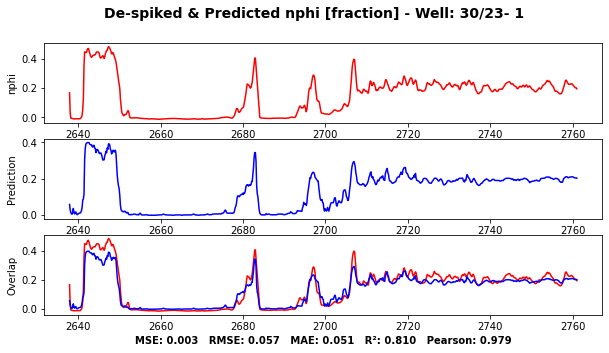

In [24]:
# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
y = df_3[f"{log}_despiked"]
y_pred = df_3[f"{log}_predicted"]
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
corr, _ = pearsonr(y, y_pred)

# Visualization
import matplotlib.pyplot as plt
import numpy as np
if log == "nphi":
    min_val = df_2[f"{log}_predicted"].min()
else:
    min_val = 0
fig, axs = plt.subplots(3, figsize=(10,5))
fig.suptitle(f"De-spiked & Predicted {log} [{units}] - Well: {well}", 
             fontsize=14, fontweight='bold'
)
axs[0].plot(df_3["md"], df_3[f"{log}_despiked"], color="red")
axs[0].set_ylabel(f"{log}")
axs[1].plot(df_3["md"], df_3[f"{log}_predicted"] - min_val, color="blue")
axs[1].set_ylabel(f"Prediction")
axs[2].plot(df_3["md"], df_3[f"{log}_despiked"], color="Red")
axs[2].set_xlabel("MD [m]")
axs[2].set_ylabel(f"Overlap")
axs[2].plot(df_3["md"], df_3[f"{log}_predicted"] - min_val, color="Blue")

metrics = f'MSE: {mse:.3f}   RMSE: {rmse:.3f}   MAE: {mae:.3f}   R²: {r2:.3f}   Pearson: {corr:.3f}'
axs[2].set_xlabel(f"{metrics}", fontsize=10, fontweight='bold')
plt.savefig("blindwell2", dpi=360)
plt.show()

In [25]:
metrics

'MSE: 0.003   RMSE: 0.057   MAE: 0.051   R²: 0.810   Pearson: 0.979'

In [26]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Coefficient of Determination (R^2):", r2)
print("Pearson correlation coefficient:", corr)

Mean Squared Error: 0.0032478314709517924
Root Mean Squared Error: 0.056989748823378684
Mean Absolute Error: 0.051085290482076634
Coefficient of Determination (R^2): 0.8104640073422812
Pearson correlation coefficient: 0.9787566542735717


## COMP

In [140]:
log = "nphi"
units = "fraction"
well = "29/27- 1"
bound1 = 2753.5632
df_1 = df_despiked.loc[(df_despiked.well_name == well) & (df_despiked.md_despiked <= bound1)].sort_values(by="md_despiked", ascending=True)
df_2 = df_predicted.loc[df_predicted.well_name == well].sort_values(by="md_predicted", ascending=True)
df_3 = pd.merge_asof(
        df_1[["md_despiked", f"{log}_despiked"]].rename(columns = {'md_despiked':'md'}).dropna(),
        df_2[["md_predicted", f"{log}_predicted"]].rename(columns = {'md_predicted':'md'}).dropna(),
        on="md",
        direction="nearest",
        tolerance=0.5
    ).dropna(subset=[f"{log}_predicted"])
df_3

,md,nphi_despiked,nphi_predicted
0,2538.9841,0.0020,0.0231
1,2541.5749,0.0277,0.0318
2,2541.7272,0.0336,0.0357
3,2541.8796,0.0322,0.0397
4,2542.0319,0.0415,0.0438
...,...,...,...
1319,2752.8012,0.4073,0.2739
1320,2752.9536,0.4117,0.2619
1321,2753.1059,0.4429,0.2471
1322,2753.2585,0.3648,0.2299


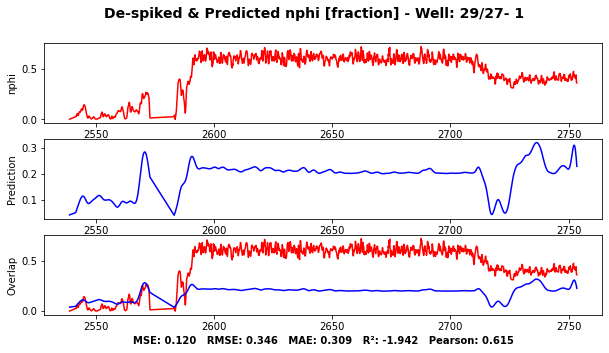

In [141]:
# Metrics
y = df_3[f"{log}_despiked"]
y_pred = df_3[f"{log}_predicted"]
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
corr, _ = pearsonr(y, y_pred)

# Visualization
import matplotlib.pyplot as plt
import numpy as np
if log == "nphi":
    min_val = df_2[f"{log}_predicted"].min()
else:
    min_val = 0
fig, axs = plt.subplots(3, figsize=(10,5))
fig.suptitle(f"De-spiked & Predicted {log} [{units}] - Well: {well}", 
             fontsize=14, fontweight='bold'
)
axs[0].plot(df_3["md"], df_3[f"{log}_despiked"], color="red")
axs[0].set_ylabel(f"{log}")
axs[1].plot(df_3["md"], df_3[f"{log}_predicted"] - min_val, color="blue")
axs[1].set_ylabel(f"Prediction")
axs[2].plot(df_3["md"], df_3[f"{log}_despiked"], color="Red")
axs[2].set_xlabel("MD [m]")
axs[2].set_ylabel(f"Overlap")
axs[2].plot(df_3["md"], df_3[f"{log}_predicted"] - min_val, color="Blue")

metrics = f'MSE: {mse:.3f}   RMSE: {rmse:.3f}   MAE: {mae:.3f}   R²: {r2:.3f}   Pearson: {corr:.3f}'
axs[2].set_xlabel(f"{metrics}", fontsize=10, fontweight='bold')
plt.savefig("blindwell2", dpi=360)
plt.show()

## SAVE DATAFRAMES IN CSVs

In [28]:
wd_path = os.getcwd() + os.path.join("\\Filtered_data\\sampled_data")
df_despiked.to_csv(wd_path + os.path.join("\\despiked.csv"))
df_predicted.to_csv(wd_path + os.path.join("\\predicted.csv"))
df_merged.to_csv(wd_path + os.path.join("\\merged.csv"))